<font size="5" color="red"><b>ch3. 분류분석</b></font>
# 1. 분류분석 개요

## 1.1 분류분석이란?
    - 타겟변수가 categorical 변수인 분석
        - 수업 e.g. mnist 숫자예측, iris 분류예측, 와인등급예측, 질병예측
        -e.g. 고객 등급예측, 휴면고객 예측, 상품구매예측, 보험사기 예측...
    -  sklearn 패키지 :예제 데이터셋, 전처리, 머신러닝 모형
## 1.2 샘플용 데이터셋 접근

### load 계열 (패키지 내 데이터 있음)
    - load_iris(), load_boston(), load_diabets(), ...
### fetch 계열 (패키지 내 데이터 없고, 인터넷 연결시 다운)
    - fetch_openml(), fetch_rov1(로이터뉴스 말뭉치)
### mark 계열 (가상의 데이터 생성)
    - make_classification() :분류분석용 데이터 생성
    - make_regression() :회귀분석용 데이터 생성
    - make_blobs() :군집분석용 데이터 생성 (타겟변수x)

In [1]:
# load 계열

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

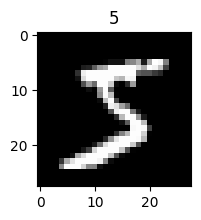

In [2]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [3]:
# fetch 계열
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name = "mnist_784",
                    version=1,
                    as_frame = False, #데이터 프레임으로 받을지 여부 - True:데이터프레임 False:넘파이
                    parser = 'auto')
X, y = mnist.data, mnist.target.astype('int')
X.shape, y.shape

((70000, 784), (70000,))

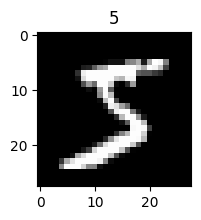

In [4]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.title(y[0])
plt.show()

# 2. 분류모형의 종류 
 - predict()
 
 ## 2.1 확률적 모형
 - 주어진 데이터에 각 클래스가 정답일 확률을 계산하는 모형
 - predict_proba() : 각 분류 클래스 별 확률을 알려줌(일부 판별함수 모형에 있기는 함)
 - predict_log_proba() :확률의 로그값을 알려줌
 
 ### 1) 확률적 생성모형
     - 각 클래스별 특징 데이터 확률 분포 추정하는 방식. 소량의 데이터로도 작동
     - e.g. QuadraticDiscriminationAnalysis, MultinomialNB
### 2) 확률적 판별모형 
    -확률을 계산하는 함수 이용
    - e.g. 의사결정나무, 로지스틱 회귀
    
## 2.2 판별함수 모형
    - 주어진 데이터를 클래스에 따라 다른 영역으로 나누는 경계면을 찾은 후,
    - 이 경계면을 계산식 => 판별함수
    - decision_function()
    - ex 퍼셉트론, SVM, MLP(신경망)
=> RandomForest, LGBM, XGBoost, CatBoost 등의 앙상블 모형이 더 많이 쓰임

# 3. 모형1 : 확률적 생성모형
 * 베이즈 정리를 사용하여 확률분포 계산
 
 ## 3.1 QDA
 * x가 연속형(실수)이면 정규분포라고 가정

In [5]:
#샘플데이터
from sklearn.datasets import make_classification
X,y = make_classification(n_features =2, #독립변수 갯수
                          n_informative = 2, #타겟변수에 영향을 주는 독립변수 갯수
                          n_redundant=0, #타겟변수에 영향을 주지 않는 독립변수 갯수
                          n_clusters_per_class=1, #클래스 내 서브그룹 수
                          n_classes=2, #타겟변수의 class 수
                          n_samples = 100, #data 갯수(행 수), 기본값=100
                          random_state=9) #시드 값
X.shape, y.shape

((100, 2), (100,))

In [6]:
import numpy as np
np.unique(y)

array([0, 1])

In [7]:
import pandas as pd
pd.Series(y).value_counts()

0    50
1    50
dtype: int64

In [8]:
# 타겟변수의 클래스 균형
# y=1로 분류된 데이터
X[y==1].shape, X[y==0].shape

((50, 2), (50, 2))

In [9]:
# 타겟변수의 클래스 균형
y.mean()

0.5

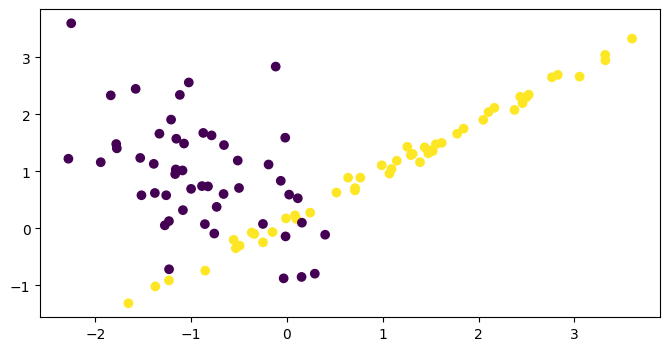

In [10]:
plt.figure(figsize=(8,4))
plt.scatter(x=X[:, 0], y=X[:,1], c=y)

In [11]:
# (0,0) 기준으로 대칭구조
X[y==1] = -X[y==1]

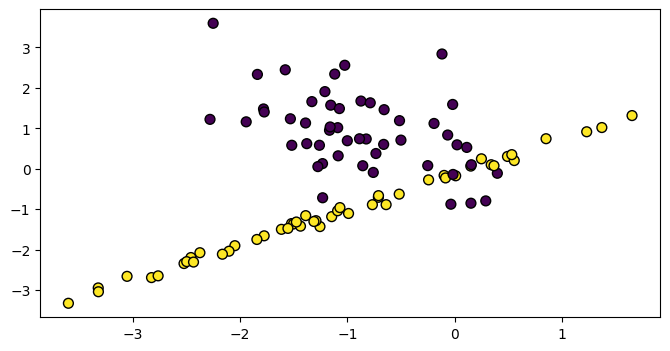

In [12]:
plt.figure(figsize=(8,4))
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=50, edgecolors='k')

In [13]:
# (0,0) 기준으로 대칭구조
X[y==1] = -X[y==0]

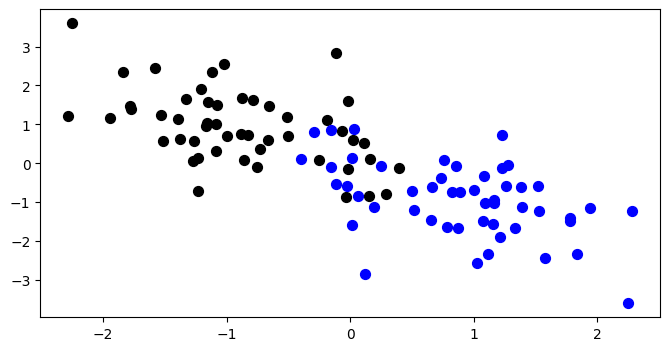

In [14]:
plt.figure(figsize=(8,4))
plt.scatter(x=X[y==0, 0], y=X[y==0, 1], c='k', s=50, edgecolors='k')
plt.scatter(x=X[y==1, 0], y=X[y==1,1], c='b', s=50)

In [15]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [16]:
x = [[0.5, 0]] # predict할 때는 2차원 데이터로
model.predict(x)

array([1])

In [17]:
model.predict_proba(x)

array([[0.16455419, 0.83544581]])

In [18]:
model.classes_ #  분류될 내용

array([0, 1])

In [19]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,1
row_0,,
0,44,6
1,6,44


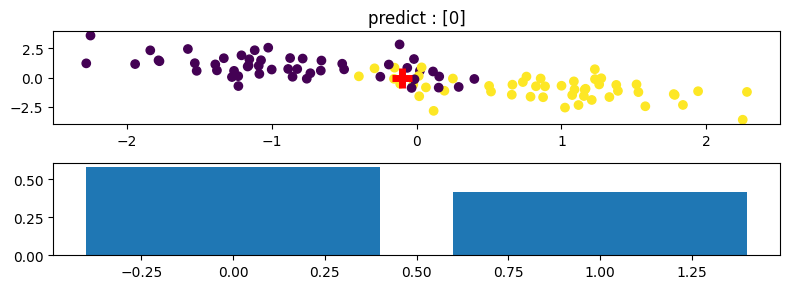

In [20]:
x = [[-0.1, 0]]
plt.figure(figsize=(8,3))
p = model.predict_proba(x)
plt.subplot(211) # 2행1열로 subplot에서 첫번째 그래프
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.scatter(x=x[0][0], y=x[0][1], c='r', s=200, marker='+', lw=5)
h = model.predict(x)
plt.title(f'predict : {h}')
plt.subplot(212)
plt.bar(model.classes_, p[0])
plt.tight_layout()
plt.show()

In [21]:
model.classes_

array([0, 1])

## 3.2 나이브베이지안 모형

In [22]:
# 데이터
import seaborn as sns
iris = sns.load_dataset('iris')
# 학습데이터는 numpy 배열
X = iris.iloc[:, :-1].values # 넘파이로 변환
y = iris.iloc[:, -1].values # 라벨인코딩없이 넘파이 배열로 변환
# 모형 생성/학습
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [23]:
# X.loc[0]

<Axes: >

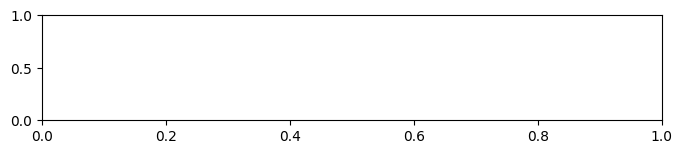

In [24]:
x = [[5.1, 3.5,1.4,0.2]]
plt.figure(figsize=(8,3))
p = model.predict_proba(x)
plt.subplot(211) #2행 1열로 subbplot에서 첫번째 그래프

In [25]:
x = [[5.1, 3.5, 1.4, 0.2]]
h = model.predict(x)
p = model.predict_proba(x)[0]
print('예측 :', h)
print(model.classes_)
print(p)

예측 : ['setosa']
['setosa' 'versicolor' 'virginica']
[0.75199536 0.16092948 0.08707516]


<BarContainer object of 3 artists>

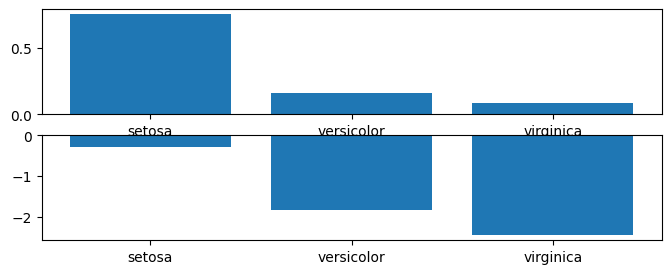

In [26]:
plt.figure(figsize=(8,3))
plt.subplot(211) # 2행1열로 subplot에서 첫번째 그래프
plt.bar(model.classes_, model.predict_proba(x)[0])
plt.subplot(2,1,2)
# plt.bar(model.classes_, model.predict_log_proba(x)[0])
plt.bar(model.classes_, np.log(model.predict_proba(x))[0])

# 4. 모형2. 확률적 판별모형
## 4.1 로지스틱 회귀분석

In [27]:
# 샘플 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1, # 독립변수 갯수
                          n_informative=1, # 타겟변수에 영향주는 독립 변수 갯수
                          n_redundant=0, # 타겟변수에 영향을 주지 않는 독립 변수 갯수
                          n_clusters_per_class=1, # 클래스 내 서브그룹수
                          n_classes=2,   # 타겟변수의 class 수
                          n_samples=100, # 데이터 갯수(행수)  100이 기본값
                          random_state=1) # seed값
X.shape, y.shape

((100, 1), (100,))

In [28]:
# 타겟변수의 클래별 균형
print(y.mean())

0.5


In [29]:
# 모형
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)

In [30]:
# -3부터 3까지 같은 간격 데이터
xx = np.linspace(-3, 3, 100)
test_x = xx.reshape(-1, 1)
y_hat = model.predict(test_x)
prob = model.predict_proba(test_x)

In [31]:
#prob[:, 0] # 0으로 분류될 확률
#prob[:, 1] # 1로 분류될 확률

<BarContainer object of 2 artists>

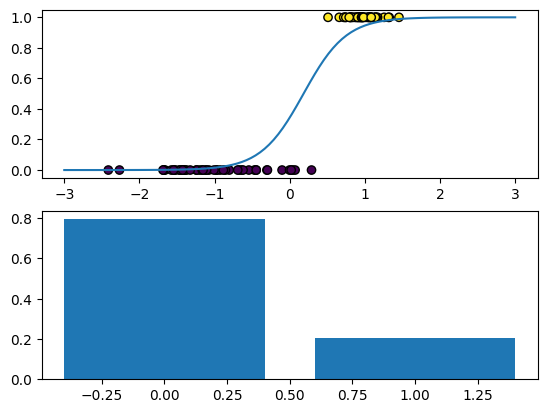

In [32]:
x = [[-0.2]]
plt.subplot(211)
plt.scatter(X, y, c=y, edgecolors='k')
plt.plot(xx, prob[:, 1])
plt.subplot(212)
prob_x = model.predict_proba(x)[0]
plt.bar(model.classes_, prob_x)

ValueError: X has 2 features, but LogisticRegression is expecting 1 features as input.

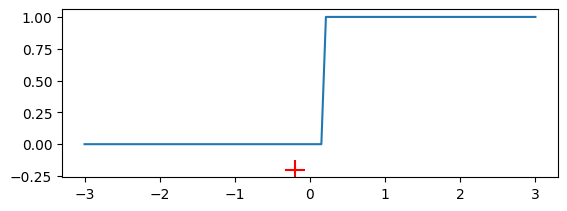

In [33]:
x = [[-0.2,-0.2]]
plt.subplot(211)
plt.plot(xx, y_hat)
plt.scatter(x[0][0], x[0][1], s=200, c='r', marker='+')
prob = model.predict_proba(x)[0]
plt.subplot(212)
plt.bar(model.classes_, prob)
plt.show()


## 4.2 의사결정나무
 - 여러가지 규칙을 순차적으로 적용하면서 독립변수 공간을 분할하는 분류모형
 - 종속변수에 영향을 주는 독립변수들을 알아보는 목적

In [40]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:] # petal_length, petal_width
# data.target_names[data.target]
y = data.target
feature_names = [name[:-5].replace(' ', '_') for name in data.feature_names[2:]]

In [41]:
# 모형
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', # 품질기준을 entropy
                                 max_depth=1,
                                 random_state=0)
dt_model.fit(X, y) # depth 1짜리 tree라 성능이 좋지 않을 듯

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [42]:
X[0]

array([1.4, 0.2])

In [43]:
test_x = [[1.4, 0.2]]
dt_model.predict(test_x)

array([0])

생성된 tree 시각화

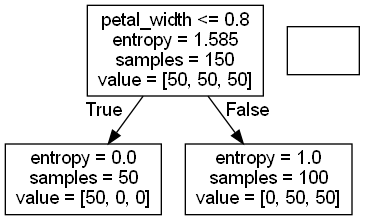

In [44]:
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image
import io
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
draw_decision_tree(dt_model, feature_names=feature_names)

In [46]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_decision_regions(X, y, model, title):
    species = ['setosa', 'versicolor', 'virginica']
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
            c=[cmap(idx)], marker=markers[idx], s=80, label=species[cl])
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    return Z

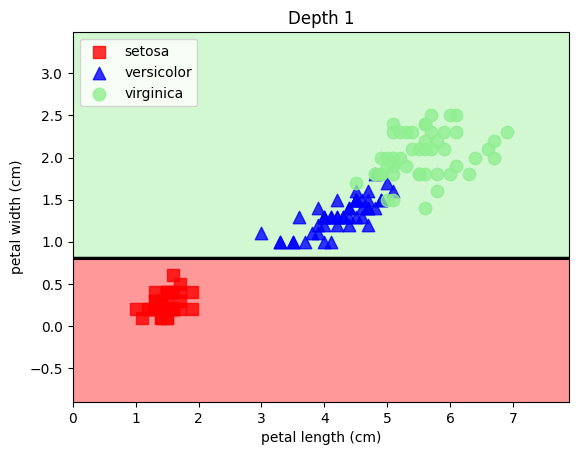

In [47]:
plot_decision_regions(X, y, dt_model, "Depth 1")
plt.show()

In [48]:
dt_model5 = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
dt_model5.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

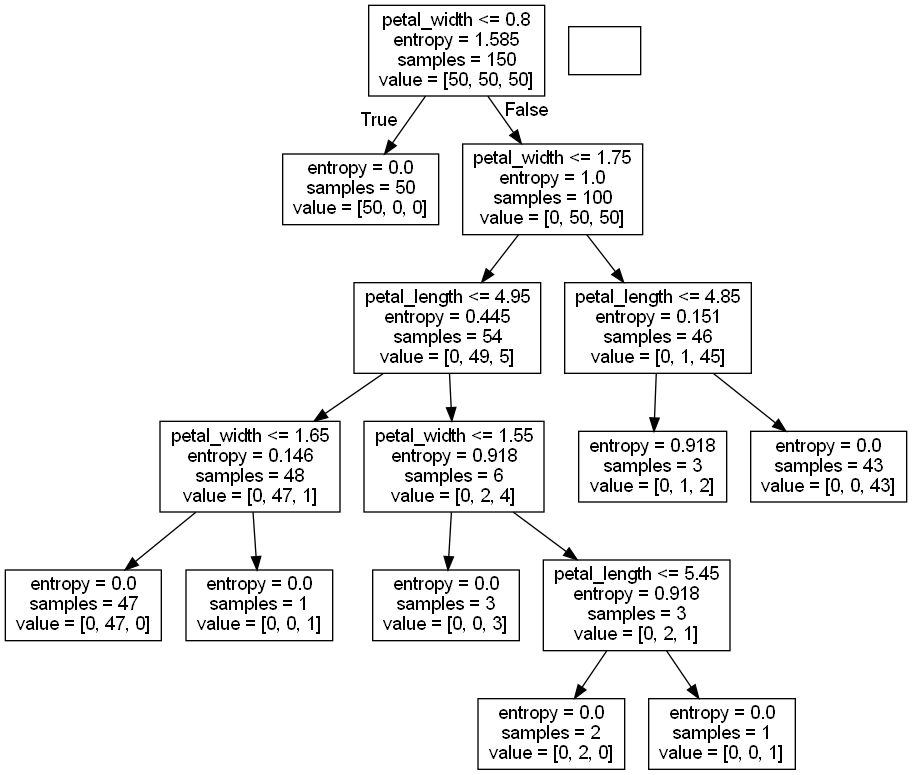

In [49]:
draw_decision_tree(dt_model5, feature_names=feature_names)

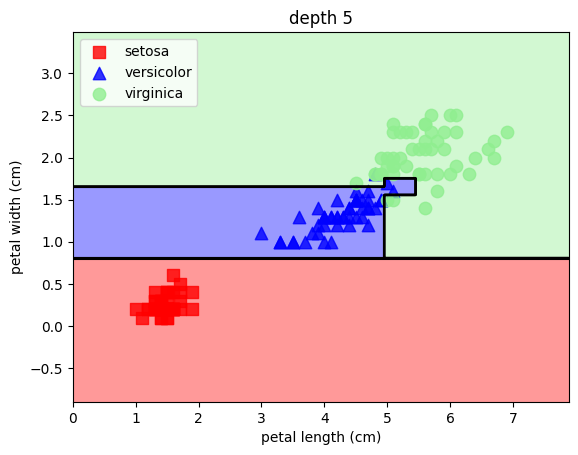

In [50]:
plot_decision_regions(X, y, dt_model5, "depth 5")
plt.show()

In [51]:
dt_model5.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5. 모형3 : 판별함수 모형
    * 동일한 클래스가 모여있는 영역과 그 영역을 나누는 경계면을 정의
    * decision_function() 제공
    * 퍼셉트론, SVN, 인공신경망모형(일부는 predict_proba도 있음)
    
## 5.1 Perceptron

In [52]:
iris = load_iris()
# 0, 2(setosa, virginica) 만
idx = np.in1d(iris.target, [0,2])
import pandas as pd
idx = pd.Series(iris.target).isin([0,2]).values

In [53]:
X = iris.data[idx, 0:2]
y = iris.target[idx]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
# 퍼셉트론 모형
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=500, # epoch 500회
                  eta0=0.1, # learning rate
                  random_state=1).fit(X, y)

In [56]:
y_hat = model.predict(X)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
(y != y_hat).sum()

1

In [58]:
# 예측값이 틀린 경우
X[y!=y_hat]

array([[4.5, 2.3]])

In [60]:
for idx, (real, hat) in enumerate(zip(y, y_hat)):
    # print(idx, real, hat)
    if real!=hat:
        print(f"{idx}번째 실제값:{real}, 예측값:{hat} = 데이터 : {X[idx]}")

41번째 실제값:0, 예측값:2 = 데이터 : [4.5 2.3]


In [61]:
test_x = X[41].reshape(1, -1)
test_x = X[41][np.newaxis, :]
test_x = np.expand_dims(X[41], axis=0)
test_x = X[41][None, :]
print(model.predict(test_x))
print(model.decision_function(test_x))

[2]
[1.24]


In [62]:
test_x = X[3].reshape(1, -1)
print(model.decision_function(test_x))

[-2.699]


## 5.2 SVC
    - Support Vector Classifier

In [63]:
from sklearn.svm import SVC
model = SVC(
#    probability=True
)
model.fit(X, y)

SVC()

In [64]:
test_x = X[41].reshape(1, -1)
print(test_x)
print('예측 :', model.predict(test_x))
print('경계면과의 거리 :', model.decision_function(test_x))
#print('예측 확률들 :', model.predict_proba(test_x))

[[4.5 2.3]]
예측 : [0]
경계면과의 거리 : [-0.72539221]


## 5.3 다중퍼셉트론 (인공신경망)
    * predict/ decision_function / predict_proba / predict_log_proba

In [65]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_X.shape, iris_y.shape
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y,
                                                   test_size=0.3,
                                                   random_state=1, 
                                                   stratify=iris_y) #층화추출

In [66]:
# 다중 퍼셉트론 모형
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50,30), #hidden layer 의 unit 수
                   max_iter = 500) #epoch
mlp.fit(iris_X,iris_y)

MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500)

In [67]:
pred = mlp.predict(test_X)
pd.crosstab(test_y, pred)

col_0,0,1,2
row_0,,,
0,15,0,0
1,0,15,0
2,0,0,15


# 6. 분류모형 성능평가
## 6.1 sklearn 모형의 평가 방법
 - metrics 모듈: ~_score
 - 혼돈행렬을 이용

In [ ]:
y_true = [1,1,0,0,2,1,0,2,2] #실제값
y_pred = [1,2,0,1,1,0,0,2,1] #예측값

In [69]:
result = pd.read_csv('data/model_result.csv') #보험사기자인지 여부(실제/예측값)
result.info()# 타입과 결측치, 메모리 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   CUST_ID  1793 non-null   int64
 1   y_true   1793 non-null   int64
 2   y_pred   1793 non-null   int64
dtypes: int64(3)
memory usage: 42.1 KB


In [70]:
# 실제 보험사기자, 보험사기자로 예측
result['y_true'].sum(), result['y_pred'].sum()

(158, 99)

In [71]:
pd.crosstab(result.y_true, result.y_pred, margins=True)

y_pred,0,1,All
y_true,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, fbeta_score

In [ ]:
confusion_matrix

In [74]:
accuracy_score(result.y_true, result.y_pred) #정확도 (전체적으로 얼마나 맞췄는지)

0.9425543781372002

In [76]:
precision_score(result.y_true, result.y_pred) #정밀도 (1로 예측한 것 중 얼마나 맞췄는지)

0.7777777777777778

In [80]:
recall_score(result.y_true, result.y_pred) # 재현율 (실제로 1 중 얼마나 맞췄는지)

0.4873417721518987

In [83]:
recall_score(result.y_true, result.y_pred, pos_label=0) #특이도 (실제 0 중 얼마나 맞췄는지)

0.9865443425076452

In [84]:
#위양성률(fallout : FPrate) : FP/(TN+FP) ;1종 오류 = 1- 특이도
1-recall_score(result.y_true, result.y_pred, pos_label=0)

0.013455657492354778

In [86]:
f1_score(result.y_true, result.y_pred) #recall과 precision의 조화평균

0.5992217898832685

In [87]:
#beta=1 : f1-score (recall과 precision의 중요도를 똑같이)
print(fbeta_score(result.y_true, result.y_pred, beta=1))

#beta=0.5 : precision의 가중치가 높음 (고객의 만족도가 중요)
print(fbeta_score(result.y_true, result.y_pred, beta=0.5))

#beta=2 : recall 가중치가 높음 (회사의 비용이 중요)
print(fbeta_score(result.y_true, result.y_pred, beta=2))

0.5992217898832685
0.6949458483754513
0.5266757865937073


## 6.2 ROC 커브를 이용한 성능 비교
 - 위양성률 (FPrate)과 재현율(TPrate)의 변화를 시각화 = 모델이 양성을 잘 맞추는 능력 (TPrate) 과 잘못 예측하는 비율(FPrate)을 비교하는 곡선
 
 - 세로축(재현율) -> 높은게 좋음
 - 가로축(위양성률) -> 낮은게 좋음

In [99]:
# 61p
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                           # n_features=20,
                          weights=[0.95, 0.05],# 0과 1의 비율
                          # n_classes=2,
                          random_state=5)
y.sum()

57

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
model1 = LogisticRegression().fit(X, y)
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)

In [101]:

pred1 = model1.predict(X)
pd.crosstab(y, pred1, rownames=['실제'], colnames=['예측'])

예측,0,1
실제,,
0,940,3
1,30,27


In [102]:
pred2 = model2.predict(X)
pd.crosstab(y, pred2, rownames=['실제'], colnames=['예측'])

예측,0,1
실제,,
0,940,3
1,30,27


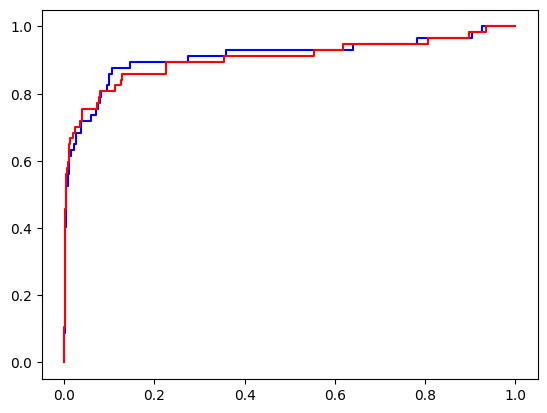

In [103]:
from sklearn.metrics import roc_curve
fpr1, tpr1, tresholds = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, tresholds = roc_curve(y, model2.decision_function(X))
plt.plot(fpr1, tpr1, c='b')
plt.plot(fpr2, tpr2, c='r')